# PFI and efPC Visualization (Neural network)

In [69]:
compute_pfi_nn <- function(x, y, model, K = 5, metric = "nmse") {
  base_pred <- as.vector(model %>% predict(x))
  base_loss <- mean((y - base_pred)^2)
  
  n_features <- ncol(x)
  pfi_values <- numeric(n_features)
  
  for (i in 1:n_features) {
    perm_losses <- numeric(K)
    
    for (k in 1:K) {
      x_perm <- x
      x_perm[, i] <- sample(x_perm[, i])  
      
      perm_pred <- as.vector(model %>% predict(x_perm))
      perm_loss <- mean((y - perm_pred)^2)
      
      perm_losses[k] <- perm_loss
    }
    
    pfi_values[i] <- mean(perm_losses) - base_loss
  }
  
  if (metric == "nmse") {
    pfi_values <- pfi_values / mean((y - mean(y))^2)
  }
  
  names(pfi_values) <- colnames(x)
  return(list(pfi = pfi_values))
}


## Compute PFI

In [70]:
set.seed(36)
pfi_nn <- compute_pfi_nn(
  x = x_test,
  y = y_test,
  model = nn_model,
  K = 10,
  metric = "nmse"
)

## PFI results (mean of reps)

=== TOP 15 PRINCIPAL COMPONENTS BY PFI (Neural Network) ===
       PC PFI_Value
pc19 pc19 59.239897
pc20 pc20 49.545594
pc23 pc23 37.494040
pc22 pc22 30.976108
pc21 pc21 27.934012
pc15 pc15 14.143569
pc24 pc24  4.310457
pc9   pc9  2.895463
pc4   pc4  1.317507
pc26 pc26  0.000000
pc27 pc27  0.000000
pc28 pc28  0.000000
pc29 pc29  0.000000
pc30 pc30  0.000000
pc31 pc31  0.000000


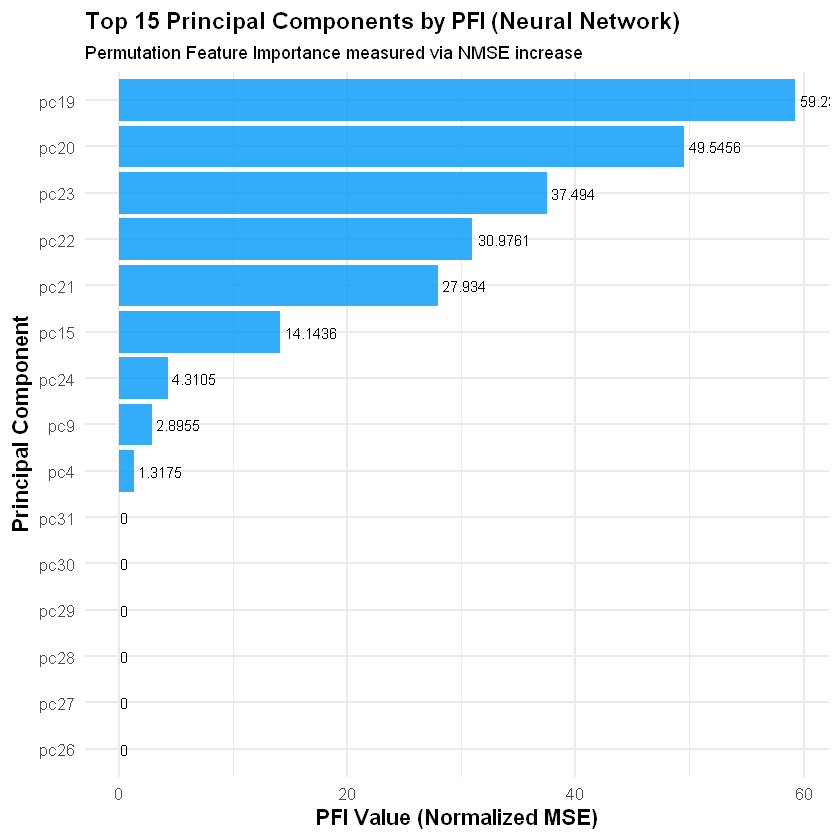

In [71]:
# Create a data frame from computed PFI values
pfi_df <- data.frame(
  PC = names(pfi_nn$pfi),   # Principal Component names (e.g., pc1, pc2, ...)
  PFI_Value = pfi_nn$pfi    # Corresponding PFI scores
) %>%
  arrange(desc(PFI_Value))   # Sort PCs in descending order of importance

# --- Print the top 15 PCs with the highest PFI values ---
cat("=== TOP 15 PRINCIPAL COMPONENTS BY PFI (Neural Network) ===\n")
print(head(pfi_df, 15))
cat("===========================================================\n")

# --- Visualize PFI values using a horizontal bar plot ---
library(ggplot2)

ggplot(head(pfi_df, 15), aes(x = reorder(PC, PFI_Value), y = PFI_Value)) +
  geom_bar(stat = "identity", fill = "#0099f9", alpha = 0.8) +  # Blue bars
  geom_text(aes(label = round(PFI_Value, 4)), 
            hjust = -0.1, size = 3.2, color = "black") +        # Value labels
  coord_flip() +  # Flip coordinates for horizontal layout
  labs(
    title = "Top 15 Principal Components by PFI (Neural Network)",
    subtitle = "Permutation Feature Importance measured via NMSE increase",
    x = "Principal Component",
    y = "PFI Value (Normalized MSE)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 11),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold")
  )
